In [1]:
import cv2
import csv
import numpy as np
from keras.models import Sequential, Model
from keras import backend as K
from keras.layers import Cropping2D
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
originalImage = cv2.imread('external/data/IMG/center_2017_09_28_15_48_18_403.jpg') 
leftImage = cv2.imread('external/data/IMG/left_2017_09_28_15_48_18_403.jpg') 
rightImage = cv2.imread('external/data/IMG/right_2017_09_28_15_48_18_403.jpg') 


In [3]:
def rand_bright(imageToProcess):
    """
    Retun a random brightness images
    """
    # Convert colorspace to HSY
    image = cv2.cvtColor(imageToProcess, cv2.COLOR_RGB2HSV)
    
    # Generate random number of brightness factor
    brightness = .25 + np.random.uniform()
    image[:,:,2] = image[:,:,2] * brightness
    
    # Convert colorspace back to RGB
    brightImage = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    return brightImage


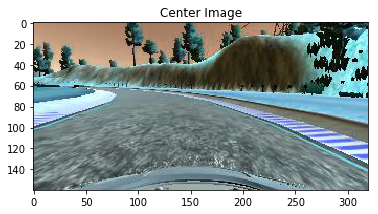

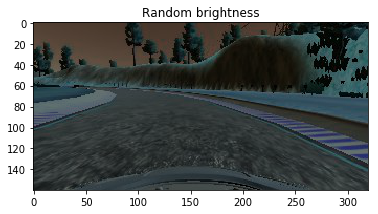

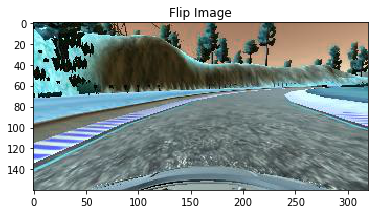

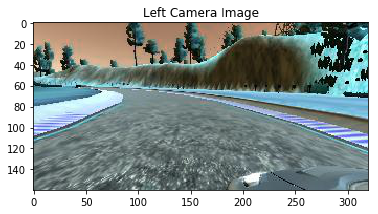

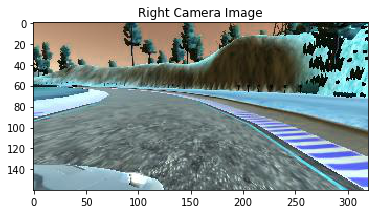

In [4]:
originalImage = cv2.imread('external/data/IMG/center_2017_09_28_15_48_18_403.jpg') 
#plt.figure(figsize=(16,16))
plt.imshow(originalImage)
plt.title('Center Image')
plt.savefig('output/center.png')
plt.show()
plt.imshow(rand_bright(originalImage))
plt.title('Random brightness')
plt.savefig('output/rand.png')
plt.show()
plt.imshow(cv2.flip(originalImage,1))
plt.title('Flip Image')
plt.savefig('output/flip.png')
plt.show()
plt.imshow(leftImage)
plt.title('Left Camera Image')
plt.savefig('output/left.png')
plt.show()
plt.imshow(rightImage)
plt.title('Right Camera Image')
plt.savefig('output/right.png')
plt.show()

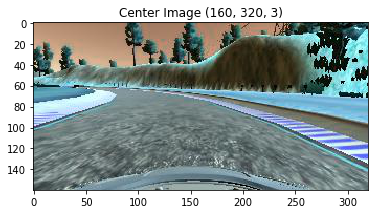

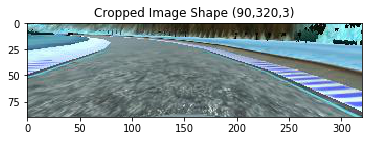

In [5]:
#print ('Original Image Shape',originalImage.shape)
plt.imshow(originalImage)
plt.title('Center Image (160, 320, 3)')
plt.savefig('output/originalImage.png')
plt.show()
model = Sequential()
model.add(Cropping2D(cropping=((50, 20), (0, 0)), input_shape=(160, 320, 3)))
crop_out = K.function([model.layers[0].input],[model.layers[0].output])
crop_image = crop_out([originalImage[None,...]])[0]
crop_image = crop_image.reshape(crop_image.shape[1:])
#print ('Cropped Shape',cropped_image.shape)
# change to uint8 per https://stackoverflow.com/questions/41925765/keras-cropping2d-changes-color-channel
plt.imshow(np.uint8(crop_image)) 
plt.title('Cropped Image Shape (90,320,3)')
plt.savefig('output/cropped.png')
plt.show()

In [6]:
lines = []
#data='data/driving_log.csv' #original Udacity data
data='external/data/driving_log.csv' #Combined Udacity plus extra
with open(data) as csvFile:
    reader = csv.reader(csvFile)
    for line in reader:
        lines.append(line)
print ('lines',len(lines))

lines 36828


In [7]:
#Collect steering angle measurement
SumMeasurement = []
for line in lines:
    SumMeasurement.append(float(line[3])) #from Center steering measurement
    SumMeasurement.append(float(line[3]) + 0.2) #from left steering measurement
    SumMeasurement.append(float(line[3]) - 0.2) #from right steering measurement
print('Total Images: {}'.format( len(SumMeasurement)))

Total Images: 110484


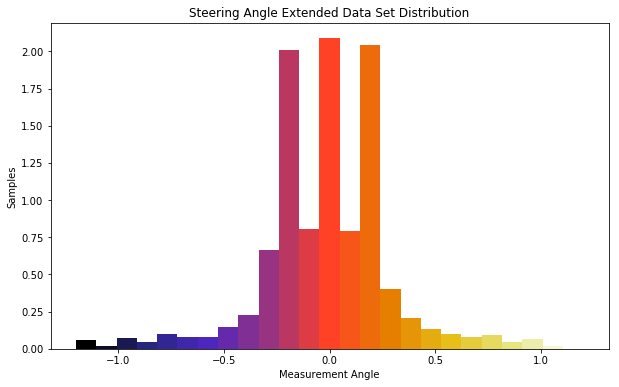

In [8]:
#print a histogram to see which steering angle ranges are most overrepresented

#Set histogram size
plt.figure(figsize=(10,6))

#Devine color map theme
colorMap = plt.cm.get_cmap('CMRmap')

# Plot angle measuement histogram.
n, bins, patches = plt.hist(SumMeasurement, 25, normed=1, color='blue')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
#plt.title('Steering Angle Original Data Set Distribution') #data='data/driving_log.csv'
plt.title('Steering Angle Extended Data Set Distribution') #data='external/data/driving_log.csv'
plt.ylabel('Samples')
plt.xlabel('Measurement Angle')

# scale values to [0,1]
columns = bin_centers - min(bin_centers)
columns /= max(columns)

for color, patch in zip(columns, patches):
    plt.setp(patch, 'facecolor', colorMap(color))
plt.savefig('output/testhist.png')
plt.show()